In [1]:
import os
from mne.io import read_raw_eeglab
import warnings; warnings.filterwarnings(action='ignore') # ignore warning for eeglab -----> yup
from utils import filter_signal
import numpy as np
import mne
import sys # for supressing the stdout
path_for_hardrive = input('Path for hardrive: ')
path =  path_for_hardrive + '/mouse_eeg/Mouse_EEG_ChronicSleepRestriction_Kim_et_al'
os.chdir(path)
sessions = {1:'BL',2:'SR1',3:'SR2',4:'SR3',5:'SR4',6:'SR5',7:'R1',8:'R2',9:'R3'}
subid = 1
sessid = 1


def load_filter_export(subid,sessid,time):
    SAMPLING_RATE = 500
    sd = 14
    path =  '/media/szigetipeter/HV620S/mouse_eeg/Mouse_EEG_ChronicSleepRestriction_Kim_et_al'
    path = path + f'/data_BIDS/sub-0{subid}/ses-0{sessid}/eeg/fixed/'
    file = f'sub-0{subid}-{sessions[sessid]}_screew_fixed_{time}-{time+1}'

    raw = read_raw_eeglab(path +'hours/' + file + '.set', preload=True)
    eeg_data = raw.get_data().T
    acc = eeg_data[:,2].reshape(-1,1)
    idx = filter_signal(acc, num_std=sd, padding_before_noise=2*SAMPLING_RATE, padding_after_noise=2*SAMPLING_RATE, max_or_sum=True, abs_or_pow=True)
    mask = np.ones(eeg_data.shape[0], dtype=bool)
    mask[idx] = False
    data = eeg_data[mask,:].T  # 4 channels, m time points
    data.shape[1]/eeg_data.shape[0]
    info = mne.create_info(['Frontal','Parietal','Acceleration','Event'][:eeg_data.shape[1]], sfreq=500, ch_types='eeg')

    # create a RawArray object from the NumPy array and MNE Info object
    raw = mne.io.RawArray(data, info)


    try:
        os.mkdir(path + 'filtered1')
    except FileExistsError:
        print('Folder already exists')

    export_path = path + '/filtered1/' + file + '_filtered.fdt'
    mne.export.export_raw(export_path,raw,'EEGLAB', overwrite=True)
    
    # Signal to Noise Ratio
    return data.shape[1]/eeg_data.shape[0]

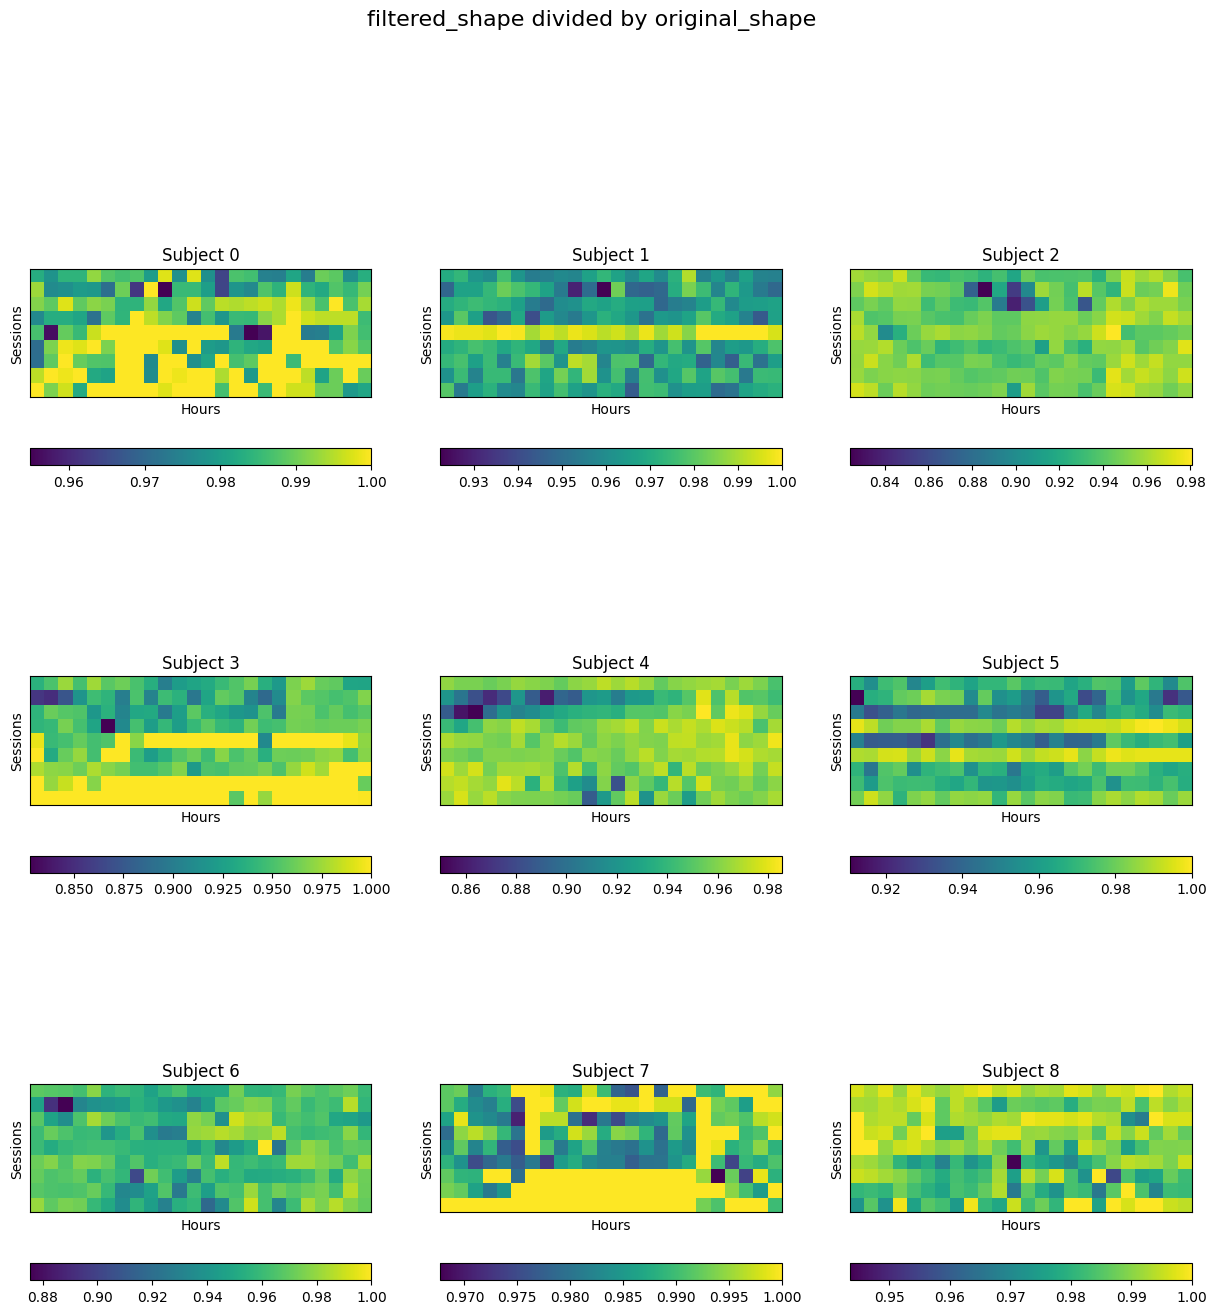

In [2]:
import matplotlib.pyplot as plt
# plot all 9 subjects in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('filtered_shape divided by original_shape', fontsize=16)
for i in range(0,9):
    im = axs[i//3,i%3].imshow(np.loadtxt(f'logs/subject_log_{i+1}.csv',delimiter=','))
    axs[i//3,i%3].set_title(f'Subject {i}')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3,i%3].set_xlabel('Hours')
    axs[i//3,i%3].set_ylabel('Sessions')
    plt.colorbar(im,ax=axs[i//3,i%3],orientation='horizontal')
  